In [101]:
import pandas as pd
import numpy as np
import scipy.stats as scipy
import matplotlib.pyplot as plt
import requests #download from football data
import io 
from __future__ import division
import seaborn as sns
%matplotlib inline

### Load the data

In [102]:
url = "http://www.football-data.co.uk/mmz4281/1718/E0.csv"

In [103]:
testfile = requests.get(url).content
df=pd.read_csv(io.StringIO(testfile.decode('utf-8')))
df.to_csv("./Data/England/E0_17.csv")

In [104]:
df = pd.read_csv("./Data/England/E0_17.csv")

In [105]:
df.columns

Index(['Unnamed: 0', 'Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG',
       'FTR', 'HTHG', 'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF',
       'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR', 'B365H', 'B365D', 'B365A',
       'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'LBH', 'LBD', 'LBA', 'PSH',
       'PSD', 'PSA', 'WHH', 'WHD', 'WHA', 'VCH', 'VCD', 'VCA', 'Bb1X2',
       'BbMxH', 'BbAvH', 'BbMxD', 'BbAvD', 'BbMxA', 'BbAvA', 'BbOU',
       'BbMx>2.5', 'BbAv>2.5', 'BbMx<2.5', 'BbAv<2.5', 'BbAH', 'BbAHh',
       'BbMxAHH', 'BbAvAHH', 'BbMxAHA', 'BbAvAHA', 'PSCH', 'PSCD', 'PSCA'],
      dtype='object')

In [106]:
df

,Unnamed: 0,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
0,0,E0,11/08/17,Arsenal,Leicester,4,3,H,2,2,...,2.32,21,-1.00,1.91,1.85,2.10,2.02,1.49,4.73,7.25
1,1,E0,12/08/17,Brighton,Man City,0,2,A,0,0,...,2.27,20,1.50,1.95,1.91,2.01,1.96,11.75,6.15,1.29
2,2,E0,12/08/17,Chelsea,Burnley,2,3,A,0,3,...,2.23,20,-1.75,2.03,1.97,1.95,1.90,1.33,5.40,12.25
3,3,E0,12/08/17,Crystal Palace,Huddersfield,0,3,A,0,2,...,1.72,18,-0.75,2.10,2.05,1.86,1.83,1.79,3.56,5.51
4,4,E0,12/08/17,Everton,Stoke,1,0,H,1,0,...,1.76,19,-0.75,1.94,1.90,2.01,1.98,1.82,3.49,5.42
5,5,E0,12/08/17,Southampton,Swansea,0,0,D,0,0,...,1.75,19,-0.75,1.83,1.78,2.16,2.10,1.56,4.25,6.85
6,6,E0,12/08/17,Watford,Liverpool,3,3,D,2,1,...,1.99,21,1.00,1.90,1.84,2.13,2.04,6.88,4.27,1.56
7,7,E0,12/08/17,West Brom,Bournemouth,1,0,H,1,0,...,1.70,22,-0.25,2.12,2.08,1.85,1.81,2.65,3.21,3.02
8,8,E0,13/08/17,Man United,West Ham,4,0,H,1,0,...,2.16,19,-1.50,2.01,1.96,1.95,1.92,1.31,5.79,12.01
9,9,E0,13/08/17,Newcastle,Tottenham,0,2,A,0,0,...,2.01,20,0.75,2.06,2.00,1.92,1.87,4.82,3.90,1.80


### Cleaning and subsetting required data

Remove betting data as we don't need it for prediction. However, they could be good indicators of a team's current form - should try it out later.

In [107]:
res_16 = df.ix[:,:23]
res_16 = res_16.drop(['Div','Date'],axis=1)
# res_14 = df_14.ix[:,:23]
# res_14 = res_14.drop(['Div','Date'],axis=1)
table_features = df.ix[:,:7]
table_features = table_features.drop(['FTHG','FTAG','Div','Date'],axis=1)
bet_16 = df.ix[:,23:]

/home/sibi/tools/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [108]:
res_16.head()
feature_table = df.ix[:,:23]

In [109]:
res_16.tail()

,Unnamed: 0,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR
135,135,Bournemouth,Burnley,1,2,A,0,1,A,R East,...,10,2,4,9,11,4,6,0,1,0
136,136,Chelsea,Swansea,1,0,H,0,0,D,N Swarbrick,...,2,10,0,10,7,15,1,1,0,0
137,137,Everton,West Ham,4,0,H,2,0,H,M Oliver,...,7,5,3,16,6,2,6,2,1,0
138,138,Man City,Southampton,2,1,H,0,0,D,P Tierney,...,6,12,2,12,11,6,5,1,1,0
139,139,Stoke,Liverpool,0,3,A,0,1,A,M Atkinson,...,14,1,7,8,10,5,9,1,5,0


In [110]:
#Team, Home Goals Score, Away Goals Score, Attack Strength, Home Goals Conceded, Away Goals Conceded, Defensive Strength
table_16 = pd.DataFrame(columns=('Team','HGS','AGS','HAS','AAS','HGC','AGC','HDS','ADS',))
table_16 = table_16[:-10]

In [111]:
res_16 = res_16[:-10]
res_16.shape[0]

130

In [112]:
avg_home_scored_16 = res_16.FTHG.sum()*1.0 / res_16.shape[0]
avg_away_scored_16 = res_16.FTAG.sum()*1.0 / res_16.shape[0]
avg_home_conceded_16 = avg_away_scored_16
avg_away_conceded_16 = avg_home_scored_16
print("Average number of goals at home",avg_home_scored_16)
print("Average number of goals away", avg_away_scored_16)
print("Average number of goals conceded at home",avg_home_conceded_16)
print("Average number of goals conceded away",avg_away_conceded_16)

Average number of goals at home 1.4538461538461538
Average number of goals away 1.1384615384615384
Average number of goals conceded at home 1.1384615384615384
Average number of goals conceded away 1.4538461538461538


In [113]:
res_home = res_16.groupby('HomeTeam')
res_away = res_16.groupby('AwayTeam')

In [114]:
# list(res_home)[0]

In [160]:
table_16.Team = res_home.HomeTeam.all().values
table_16.HGS = res_home.FTHG.sum().values
table_16.HGC = res_home.FTAG.sum().values
table_16.AGS = res_away.FTAG.sum().values
table_16.AGC = res_away.FTHG.sum().values

In [116]:
#Assuming number of home games = number of away games
num_games = res_16.shape[0]/20

In [117]:
table_16.HAS = (table_16.HGS / num_games) / avg_home_scored_16
table_16.AAS = (table_16.AGS / num_games) / avg_away_scored_16
table_16.HDS = (table_16.HGC / num_games) / avg_home_conceded_16
table_16.ADS = (table_16.AGC / num_games) / avg_away_conceded_16
table_16

,Team,HGS,AGS,HAS,AAS,HGC,AGC,HDS,ADS
0,Arsenal,15,8,1.587302,1.081081,4,12,0.540541,1.269841
1,Bournemouth,7,4,0.740741,0.540541,6,8,0.810811,0.846561
2,Brighton,8,5,0.846561,0.675676,7,7,0.945946,0.740741
3,Burnley,5,7,0.529101,0.945946,3,7,0.405405,0.740741
4,Chelsea,9,15,0.952381,2.027027,6,5,0.810811,0.529101
5,Crystal Palace,8,0,0.846561,0.000000,12,13,1.621622,1.375661
6,Everton,8,5,0.846561,0.675676,12,16,1.621622,1.693122
7,Huddersfield,6,3,0.634921,0.405405,8,11,1.081081,1.164021
8,Leicester,8,9,0.846561,1.216216,8,11,1.081081,1.164021
9,Liverpool,13,12,1.375661,1.621622,2,16,0.270270,1.693122


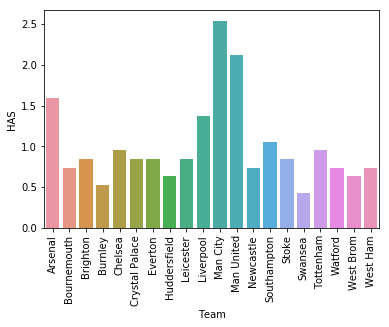

In [173]:
has_plot = sns.barplot(table_16.Team,table_16.HAS)
for item in has_plot.get_xticklabels():
    item.set_rotation(90)

In [118]:
table_16[table_16.Team == "Swansea"]

,Team,HGS,AGS,HAS,AAS,HGC,AGC,HDS,ADS
15,Swansea,4,3,0.42328,0.405405,10,5,1.351351,0.529101


In [119]:
''' feature_table contains all the fixtures in the current season.
ftr = full time result
hst = home shots on target
ast = away shots on target
'''

feature_table = feature_table[['HomeTeam','AwayTeam','FTR','HST','AST']]
f_HAS = []
f_HDS = []
f_AAS = []
f_ADS = []
for index,row in feature_table.iterrows():
    f_HAS.append(table_16[table_16['Team'] == row['HomeTeam']]['HAS'].values[0])
    f_HDS.append(table_16[table_16['Team'] == row['HomeTeam']]['HDS'].values[0])
    f_AAS.append(table_16[table_16['Team'] == row['AwayTeam']]['AAS'].values[0])
    f_ADS.append(table_16[table_16['Team'] == row['AwayTeam']]['ADS'].values[0])
    
feature_table['HAS'] = f_HAS
feature_table['HDS'] = f_HDS
feature_table['AAS'] = f_AAS
feature_table['ADS'] = f_ADS

In [120]:
feature_table.head(20)

,HomeTeam,AwayTeam,FTR,HST,AST,HAS,HDS,AAS,ADS
0,Arsenal,Leicester,H,10,3,1.587302,0.540541,1.216216,1.164021
1,Brighton,Man City,A,2,4,0.846561,0.945946,2.432432,0.423280
2,Chelsea,Burnley,A,6,5,0.952381,0.810811,0.945946,0.740741
3,Crystal Palace,Huddersfield,A,4,6,0.846561,1.621622,0.405405,1.164021
4,Everton,Stoke,H,4,1,0.846561,1.621622,1.081081,1.587302
5,Southampton,Swansea,D,2,0,1.058201,1.216216,0.405405,0.529101
6,Watford,Liverpool,D,4,5,0.740741,1.486486,1.621622,1.693122
7,West Brom,Bournemouth,H,6,2,0.634921,1.351351,0.540541,0.846561
8,Man United,West Ham,H,6,1,2.116402,0.135135,0.675676,1.587302
9,Newcastle,Tottenham,A,3,6,0.740741,1.081081,1.621622,0.529101


In [121]:
def transformResult(row):
    '''Converts results (H,A or D) into numeric values'''
    if(row.FTR == 'H'):
        return 1
    elif(row.FTR == 'A'):
        return -1
    else:
        return 0

In [122]:
feature_table["Result"] = feature_table.apply(lambda row: transformResult(row),axis=1)

In [123]:
feature_table = feature_table[:-10] #ONLY FOR WEEK 33. REMOVE FROM 34
feature_table.tail(10)

,HomeTeam,AwayTeam,FTR,HST,AST,HAS,HDS,AAS,ADS,Result
120,West Ham,Leicester,D,4,2,0.740741,1.486486,1.216216,1.164021,0
121,Crystal Palace,Stoke,H,5,3,0.846561,1.621622,1.081081,1.587302,1
122,Liverpool,Chelsea,D,4,3,1.375661,0.270270,2.027027,0.529101,0
123,Man United,Brighton,H,4,2,2.116402,0.135135,0.675676,0.740741,1
124,Newcastle,Watford,A,2,4,0.740741,1.081081,2.027027,1.058201,-1
125,Swansea,Bournemouth,D,1,5,0.423280,1.351351,0.540541,0.846561,0
126,Tottenham,West Brom,D,5,2,0.952381,0.675676,0.540541,0.952381,0
127,Burnley,Arsenal,A,2,2,0.529101,0.405405,1.081081,1.269841,-1
128,Huddersfield,Man City,A,0,5,0.634921,1.081081,2.432432,0.423280,-1
129,Southampton,Everton,H,5,2,1.058201,1.216216,0.675676,1.693122,1


In [124]:
X_train = feature_table[['HST','AST','HAS','HDS','AAS','ADS',]]
y_train = feature_table['Result']

In [125]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import voting_classifier
from sklearn.svm import LinearSVC

In [126]:
clf1 = RandomForestClassifier()
clf2 = MultinomialNB()
clf3 = XGBClassifier()
clf4 = LinearSVC()

In [127]:
y_pred = clf4.fit(X_train,y_train).predict(X_train)
accuracy_score(y_pred,y_train)
scores = cross_val_score(clf1, X_train, y_train, cv=10)
print(scores)
print(scores.mean())

[ 0.64285714  0.53846154  0.76923077  0.53846154  0.61538462  0.30769231
  0.38461538  0.53846154  0.69230769  0.58333333]
0.561080586081


In [128]:
y_pred = clf1.fit(X_train,y_train).predict(X_train)
accuracy_score(y_pred,y_train)
scores = cross_val_score(clf1, X_train, y_train, cv=10)
print(scores)
print(scores.mean())

[ 0.5         0.46153846  0.61538462  0.61538462  0.61538462  0.46153846
  0.69230769  0.53846154  0.53846154  0.58333333]
0.562179487179


In [129]:
y_pred = clf2.fit(X_train,y_train).predict(X_train)
accuracy_score(y_pred,y_train)
scores = cross_val_score(clf2, X_train, y_train, cv=10)
print(scores)
print(scores.mean())

[ 0.64285714  0.53846154  0.61538462  0.69230769  0.61538462  0.53846154
  0.76923077  0.61538462  0.61538462  0.66666667]
0.630952380952


In [130]:
y_pred = clf3.fit(X_train, y_train).predict(X_train)
accuracy_score(y_pred,y_train)
scores = cross_val_score(clf3, X_train, y_train, cv=10)
print(scores)
print(scores.mean())

[ 0.42857143  0.46153846  0.76923077  0.69230769  0.53846154  0.53846154
  0.61538462  0.46153846  0.69230769  0.66666667]
0.586446886447


## Adding Recent Performance

In [131]:
#What is this for?
ht = res_16.loc[40].HomeTeam
at = res_16.loc[40].AwayTeam

In [132]:
feat_table = res_16.sort_index(ascending=False)
feat_table = feat_table[['HomeTeam','AwayTeam','FTR','FTHG','FTAG','HS','AS','HC','AC']]

In [133]:
# Adding next week fixtures
new_fixtures = pd.DataFrame( [['Man City','West Ham','D',0,0,0,0,0,0],
                             ['Bournemouth','Southampton','D',0,0,0,0,0,0],
                             ['Arsenal','Man United','D',0,0,0,0,0,0],
                             ['Leicester','Burnley','D',0,0,0,0,0,0],
                             ['Everton','Huddersfield','D',0,0,0,0,0,0],
                             ['West Brom','Crystal Palace','D',0,0,0,0,0,0],
                             ['Watford','Tottenham','D',0,0,0,0,0,0],
                             ['Brighton','Liverpool','D',0,0,0,0,0,0],
                             ['Stoke','Swansea','D',0,0,0,0,0,0],
                             ['Chelsea','Newcastle','D',0,0,0,0,0,0]],columns=feat_table.columns)

In [134]:
new_feat_table = new_fixtures.append(feat_table,ignore_index=True)
new_feat_table = new_feat_table.sort_index(ascending=False)
new_feat_table = new_feat_table.reset_index().drop(['index'], axis=1)
new_feat_table = new_feat_table.sort_index(ascending=False)
# feat_table = n
feat_table = new_feat_table
feat_table.shape

(140, 9)

In [135]:
#Adding k recent performance measures
feat_table["pastHS"] = 0.0
feat_table["pastHC"] = 0.0
feat_table["pastAS"] = 0.0
feat_table["pastAC"] = 0.0
feat_table["pastHG"] = 0.0
feat_table["pastAG"] = 0.0

In [136]:
feat_table.head(12)

,HomeTeam,AwayTeam,FTR,FTHG,FTAG,HS,AS,HC,AC,pastHS,pastHC,pastAS,pastAC,pastHG,pastAG
139,Man City,West Ham,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
138,Bournemouth,Southampton,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
137,Arsenal,Man United,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
136,Leicester,Burnley,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
135,Everton,Huddersfield,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
134,West Brom,Crystal Palace,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
133,Watford,Tottenham,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
132,Brighton,Liverpool,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
131,Stoke,Swansea,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
130,Chelsea,Newcastle,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [137]:
# for index,row in feat_table.iterrows():
#     #print row['HomeTeam'], table_16[table_16['Team'] == row['HomeTeam']]['HAS'].values

In [138]:
# Adding k recent performance metrics. Change value of k.
k = 3
for i in range(feat_table.shape[0]-1,-1,-1):
    row = feat_table.loc[i]
    ht = row.HomeTeam
    at = row.AwayTeam
    ht_stats = feat_table.loc[i-1:-1][(feat_table.HomeTeam == ht) | (feat_table.AwayTeam == ht)].head(k)
    at_stats = feat_table.loc[i-1:-1][(feat_table.HomeTeam == at) | (feat_table.AwayTeam == at)].head(k)

    feat_table.set_value(i, 'pastHC', (ht_stats[ht_stats["AwayTeam"] == ht].sum().HC + ht_stats[ht_stats["HomeTeam"] == ht].sum().HC)/k)
    feat_table.set_value(i, 'pastAC', (at_stats[at_stats["AwayTeam"] == at].sum().HC + at_stats[at_stats["HomeTeam"] == at].sum().HC)/k)
    feat_table.set_value(i, 'pastHS', (ht_stats[ht_stats["AwayTeam"] == ht].sum().HS + ht_stats[ht_stats["HomeTeam"] == ht].sum().AS)/k)
    feat_table.set_value(i, 'pastAS', (at_stats[at_stats["AwayTeam"] == at].sum().HS + at_stats[at_stats["HomeTeam"] == at].sum().AS)/k)
    feat_table.set_value(i, 'pastHG', (ht_stats[ht_stats["AwayTeam"] == ht].sum().FTAG + ht_stats[ht_stats["HomeTeam"] == ht].sum().FTHG)/k)
    feat_table.set_value(i, 'pastAG', (at_stats[at_stats["AwayTeam"] == at].sum().FTAG + at_stats[at_stats["HomeTeam"] == at].sum().FTHG)/k)

f_HAS = []
f_HDS = []
f_AAS = []
f_ADS = []
for index,row in feat_table.iterrows():
    #print row
    f_HAS.append(table_16[table_16['Team'] == row['HomeTeam']]['HAS'].values[0])
    f_HDS.append(table_16[table_16['Team'] == row['HomeTeam']]['HDS'].values[0])
    f_AAS.append(table_16[table_16['Team'] == row['HomeTeam']]['AAS'].values[0])
    f_ADS.append(table_16[table_16['Team'] == row['HomeTeam']]['ADS'].values[0])
    
feat_table['HAS'] = f_HAS
feat_table['HDS'] = f_HDS
feat_table['AAS'] = f_AAS
feat_table['ADS'] = f_ADS

/home/sibi/tools/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/home/sibi/tools/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [139]:
test_table = feat_table.drop(['FTHG','FTAG','HS','AS','HC','AC'],axis=1)

In [140]:
test_table["Result"] = test_table.apply(lambda row: transformResult(row),axis=1)
test_table.sort_index(inplace=True)

In [141]:
# num_games decides the train-test split
print(feat_table.shape)
num_games = feat_table.shape[0]-10
num_games

(140, 19)


130

In [142]:
X_train = test_table[['pastHS','pastHC','pastAS','pastAC','pastHG','pastAG','HAS','HDS','AAS','ADS']].loc[0:num_games]
y_train = test_table['Result'].loc[0:num_games]
X_test = test_table[['pastHS','pastHC','pastAS','pastAC','pastHG','pastAG','HAS','HDS','AAS','ADS']].loc[num_games:]
y_test = test_table['Result'].loc[num_games:]

In [143]:
### Try predictions here too.

# Adding home advantage

In [144]:
test_table["pastCornerDiff"] = (test_table["pastHC"] - test_table["pastAC"])/k
test_table["pastGoalDiff"] = (test_table["pastHG"] - test_table["pastAG"])/k
test_table["pastShotsDiff"] = (test_table["pastHS"] - test_table["pastAG"])/k

In [145]:
''' number of games to exclude in the training set for validation
For example, if 240 games have been played, test_table has 250 fixtures - the last 10 being the ones that haven't
been played. So, we set aside 20 fixtures from the training set containing 240 fixtures for validation.''' 
num_games = feat_table.shape[0]-10
print(num_games)
v_split = 15
n_games = num_games - v_split

130


In [146]:
test_table.head()

,HomeTeam,AwayTeam,FTR,pastHS,pastHC,pastAS,pastAC,pastHG,pastAG,HAS,HDS,AAS,ADS,Result,pastCornerDiff,pastGoalDiff,pastShotsDiff
0,Arsenal,Leicester,H,0.0,0.0,0.0,0.0,0.0,0.0,1.587302,0.540541,1.081081,1.269841,1,0.0,0.0,0.0
1,Brighton,Man City,A,0.0,0.0,0.0,0.0,0.0,0.0,0.846561,0.945946,0.675676,0.740741,-1,0.0,0.0,0.0
2,Chelsea,Burnley,A,0.0,0.0,0.0,0.0,0.0,0.0,0.952381,0.810811,2.027027,0.529101,-1,0.0,0.0,0.0
3,Crystal Palace,Huddersfield,A,0.0,0.0,0.0,0.0,0.0,0.0,0.846561,1.621622,0.000000,1.375661,-1,0.0,0.0,0.0
4,Everton,Stoke,H,0.0,0.0,0.0,0.0,0.0,0.0,0.846561,1.621622,0.675676,1.693122,1,0.0,0.0,0.0


In [147]:
test_table.drop(['pastHC','pastAS','pastAC','pastHG','pastAG'],axis=1)
X_train = test_table[['pastCornerDiff','pastGoalDiff','pastShotsDiff','HAS','HDS','AAS','ADS']].loc[0:n_games]
y_train = test_table['Result'].loc[0:n_games]
X_test = test_table[['pastCornerDiff','pastGoalDiff','pastShotsDiff','HAS','HDS','AAS','ADS']].loc[n_games:num_games-1]
y_test = test_table['Result'].loc[n_games:num_games-1]
X_predict = test_table[['pastCornerDiff','pastGoalDiff','pastShotsDiff','HAS','HDS','AAS','ADS']].loc[num_games:]

In [148]:
X_predict

,pastCornerDiff,pastGoalDiff,pastShotsDiff,HAS,HDS,AAS,ADS
130,-1.555556,0.555556,3.555556,0.952381,0.810811,2.027027,0.529101
131,-0.555556,0.555556,3.666667,0.846561,1.486486,1.081081,1.587302
132,0.000000,-0.555556,3.555556,0.846561,0.945946,0.675676,0.740741
133,-1.555556,0.555556,3.333333,0.740741,1.486486,2.027027,1.058201
134,-1.111111,-0.333333,4.222222,0.634921,1.351351,0.540541,0.952381
135,0.444444,0.444444,4.666667,0.846561,1.621622,0.675676,1.693122
136,-1.333333,0.000000,3.111111,0.846561,1.081081,1.216216,1.164021
137,-0.333333,-0.111111,2.888889,1.587302,0.540541,1.081081,1.269841
138,-0.333333,0.111111,4.666667,0.740741,0.810811,0.540541,0.846561
139,-0.111111,0.555556,1.111111,2.539683,0.540541,2.432432,0.423280


In [149]:
# clf1.fit(X_train,y_train)
# #clf2.fit(X_train,y_train)
# clf3.fit(X_train,y_train)
# clf4.fit(X_train,y_train)
# clf5.fit(X_train,y_train)
# clf6.fit(X_train,y_train)

In [150]:
#KNN
plot_scores_knn = []
for b in range(1,50):
    clf_knn = KNeighborsClassifier(n_neighbors=b)
    clf_knn.fit(X_train,y_train)
    scores = accuracy_score(y_test,clf_knn.predict(X_test))
    plot_scores_knn.append(scores)

#XGBClassifier
plot_scores_XGB = []
for i in range(1,100):
    clf_XGB = XGBClassifier(n_estimators=i,max_depth=100)
    clf_XGB.fit(X_train, y_train)
    scores = accuracy_score(y_test,clf_XGB.predict(X_test))
    plot_scores_XGB.append(scores)
    
#Logistic Regression
plot_scores_logreg= []
cs = [0.01,0.02,0.1,0.5,1,3,4,5,10]
for c in cs:
    clf_logreg = LogisticRegression(C=c,solver='lbfgs',multi_class='ovr')
    clf_logreg.fit(X_train, y_train)
    scores = accuracy_score(y_test,clf_logreg.predict(X_test))
    plot_scores_logreg.append(scores)


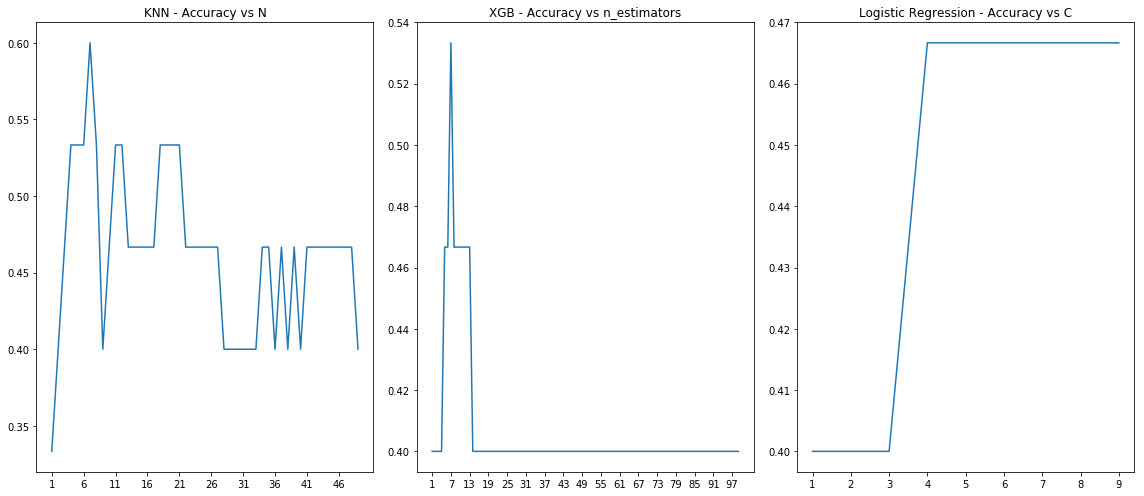

In [151]:
fig = plt.figure(figsize = (16,7))
# plt.style.use('ggplot')

ax1 = fig.add_subplot(1,3,1)
ax1.plot(range(1,50),plot_scores_knn);
ax1.set_title("KNN - Accuracy vs N")
ax1.set_xticks(range(1,50,5));

ax2 = fig.add_subplot(1,3,2)
ax2.plot(range(1,100),plot_scores_XGB);
ax2.set_xticks(range(1,100,6));
ax2.set_title("XGB - Accuracy vs n_estimators")

ax3 = fig.add_subplot(1,3,3)
ax3.plot(range(1,10),plot_scores_logreg);
ax3.set_xticks(range(1,10));
ax3.set_title("Logistic Regression - Accuracy vs C")

fig.tight_layout()

In [152]:
max_knn_n = max(plot_scores_knn)
max_knn_ind = plot_scores_knn.index(max_knn_n)

max_XGB_e = max(plot_scores_XGB)
max_XGB_ind = plot_scores_XGB.index(max_XGB_e) if plot_scores_XGB.index(max_XGB_e)!=0 else 1

max_logreg_c = max(plot_scores_logreg)
max_logreg_ind = plot_scores_logreg.index(max_logreg_c)

print(max_knn_n, max_knn_ind)
print(max_XGB_e, max_XGB_ind)
print(max_logreg_c, max_logreg_ind)

#max_knn_ind=15 
#max_XGB_ind=40
#max_logreg_ind=3



0.6 6
0.533333333333 6
0.466666666667 3


In [153]:
clf_knn = KNeighborsClassifier(n_neighbors=max_knn_ind).fit(X_train,y_train)
clf_XGB = XGBClassifier(n_estimators=max_XGB_ind).fit(X_train,y_train)
clf_logreg = LogisticRegression(C=max_logreg_ind,solver='lbfgs',multi_class='ovr').fit(X_train,y_train)

In [154]:
y_pred_knn = clf_knn.predict(X_predict)
y_pred_XGB = clf_XGB.predict(X_predict)
y_pred_logreg = clf_logreg.predict(X_predict)

In [155]:
this_week = test_table[['HomeTeam','AwayTeam']].loc[num_games:]
this_week['Result_knn']=y_pred_knn
this_week['Result_XGB']=y_pred_XGB
this_week['Result_logreg']=y_pred_logreg

In [156]:
this_week

,HomeTeam,AwayTeam,Result_knn,Result_XGB,Result_logreg
130,Chelsea,Newcastle,1,1,1
131,Stoke,Swansea,-1,1,1
132,Brighton,Liverpool,-1,-1,-1
133,Watford,Tottenham,-1,1,1
134,West Brom,Crystal Palace,-1,-1,-1
135,Everton,Huddersfield,-1,1,1
136,Leicester,Burnley,1,1,1
137,Arsenal,Man United,1,1,1
138,Bournemouth,Southampton,1,1,1
139,Man City,West Ham,1,1,1


In [157]:
def transformResultBack(row,col_name):
    if(row[col_name] == 1):
        return 'H'
    elif(row[col_name] == -1):
        return 'A'
    else:
        return 'D'

In [158]:
this_week["Res_knn"] = this_week.apply(lambda row: transformResultBack(row,"Result_knn"),axis=1)
this_week["Res_XGB"] = this_week.apply(lambda row: transformResultBack(row,"Result_XGB"),axis=1)
this_week["Res_logreg"] = this_week.apply(lambda row: transformResultBack(row,"Result_logreg"),axis=1)

this_week.drop(["Result_knn", "Result_XGB","Result_logreg"],axis=1,inplace=True)

In [159]:
print(max_knn_n, max_XGB_e, max_logreg_c)
this_week

0.6 0.533333333333 0.466666666667


,HomeTeam,AwayTeam,Res_knn,Res_XGB,Res_logreg
130,Chelsea,Newcastle,H,H,H
131,Stoke,Swansea,A,H,H
132,Brighton,Liverpool,A,A,A
133,Watford,Tottenham,A,H,H
134,West Brom,Crystal Palace,A,A,A
135,Everton,Huddersfield,A,H,H
136,Leicester,Burnley,H,H,H
137,Arsenal,Man United,H,H,H
138,Bournemouth,Southampton,H,H,H
139,Man City,West Ham,H,H,H
